In [1]:
# Kerasのset_random_seed関数を使い、乱数を固定する
from tensorflow.keras import utils
utils.set_random_seed(0)

In [2]:
# CIFAR-10のデータを取得する
import tensorflow as tf
data = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [3]:
data

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [4]:
(x_train, y_train), (x_test, y_test) = data

In [24]:
# 取得データの確認
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [26]:
# numpyのamin関数、amax関数を利用する
import numpy as np
print(np.amin(x_train), np.amax(x_train))
print(np.amin(y_train), np.amax(y_train))
print(np.amin(x_test), np.amax(x_test))
print(np.amin(y_test), np.amax(y_test))

0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0


In [25]:
# x_trainの２つ目のデータを表示
x_train[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

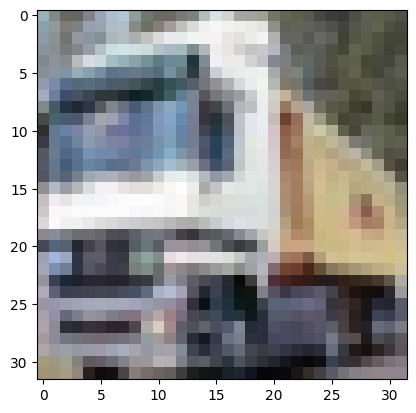

In [27]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [9]:
y_train[1]

array([9], dtype=uint8)

In [10]:
# x_train,x_testのスケーリングの実施
x_train = x_train / 255
x_test = x_test / 255

In [11]:
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)


In [12]:
# 構造を定義するための主要クラスをインポートする
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

In [13]:
# Sequentialクラスのインスタンス化
model = Sequential()

In [14]:
# CNNの構造を定義する
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))


In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))


In [16]:
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [17]:
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 120)               9

In [28]:
# Sequengtialクラスのcompileメゾットを使って設定する
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [23]:
# 学習を行う
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_split=0.1)

Epoch 1/10
352/352 [==============================] - 217s 617ms/step - loss: 0.6972 - accuracy: 0.7565 - val_loss: 0.8149 - val_accuracy: 0.7274
Epoch 2/10
352/352 [==============================] - 211s 599ms/step - loss: 0.6232 - accuracy: 0.7817 - val_loss: 0.8157 - val_accuracy: 0.7342
Epoch 3/10
352/352 [==============================] - 222s 632ms/step - loss: 0.5517 - accuracy: 0.8060 - val_loss: 0.8084 - val_accuracy: 0.7404
Epoch 4/10
352/352 [==============================] - 215s 612ms/step - loss: 0.4821 - accuracy: 0.8319 - val_loss: 0.8325 - val_accuracy: 0.7414
Epoch 5/10
352/352 [==============================] - 207s 588ms/step - loss: 0.4172 - accuracy: 0.8542 - val_loss: 0.8811 - val_accuracy: 0.7364
Epoch 6/10
352/352 [==============================] - 186s 530ms/step - loss: 0.3624 - accuracy: 0.8725 - val_loss: 0.9035 - val_accuracy: 0.7374
Epoch 7/10
352/352 [==============================] - 192s 546ms/step - loss: 0.3052 - accuracy: 0.8934 - val_loss: 0.9972 -

In [30]:
# pandasのDataFrameへ変換する
import pandas as pd
df = pd.DataFrame(history.history)


<Axes: >

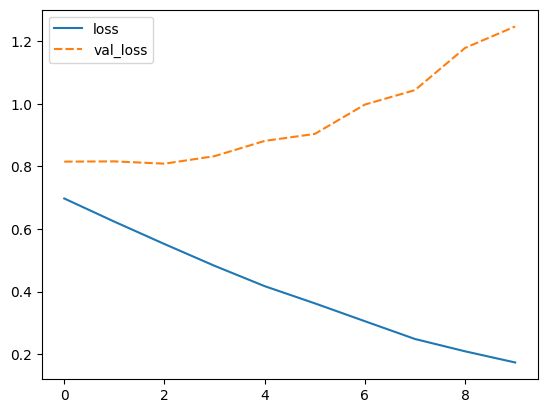

In [31]:
# seabornのlineplotメゾットを利用して損失関数（loss, val_loss)の推移を可視化する
import seaborn as sns
sns.lineplot(data=df[['loss', 'val_loss']])


<Axes: >

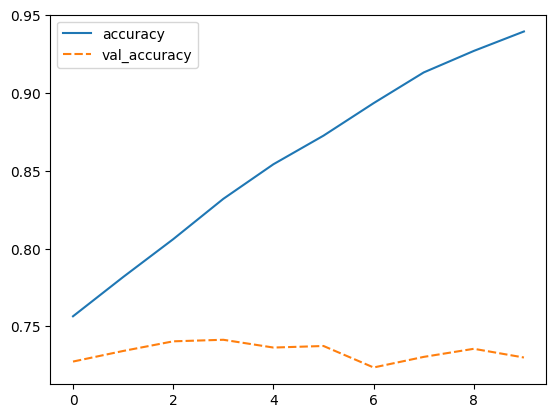

In [32]:
# 正解率も可視化する
sns.lineplot(data=df[['accuracy', 'val_accuracy']])

In [33]:
# 乱数の固定
utils = Sequential()
# モデルの定義
model = Sequential()
model.add((Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 誤差関数、最適化手法、評価指標の設定
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

# 学習
model.fit(x_train, y_train,
          batch_size=128,
          epochs=5,
          validation_split=0.1)

Epoch 1/5
352/352 [==============================] - 196s 555ms/step - loss: 1.5519 - accuracy: 0.4385 - val_loss: 1.2244 - val_accuracy: 0.5612
Epoch 2/5
352/352 [==============================] - 187s 531ms/step - loss: 1.1139 - accuracy: 0.6052 - val_loss: 1.0029 - val_accuracy: 0.6462
Epoch 3/5
352/352 [==============================] - 180s 510ms/step - loss: 0.9501 - accuracy: 0.6670 - val_loss: 0.9393 - val_accuracy: 0.6710
Epoch 4/5
352/352 [==============================] - 191s 542ms/step - loss: 0.8413 - accuracy: 0.7063 - val_loss: 0.8645 - val_accuracy: 0.7054
Epoch 5/5
352/352 [==============================] - 183s 520ms/step - loss: 0.7482 - accuracy: 0.7375 - val_loss: 0.8299 - val_accuracy: 0.7140


In [ ]:
# 評価の実行
model.evaluate(x_test, y_test)

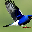

In [34]:
from tensorflow.keras.preprocessing.image import load_img
unknown_img = load_img('/content/unknown_cifar.jpg', target_size=(32, 32))
unknown_img


In [35]:
from tensorflow.keras.preprocessing.image import img_to_array
unknown_array = img_to_array(unknown_img)


In [37]:
unknown_array = unknown_array/255


In [38]:
unknown_array.shape

(32, 32, 3)

In [40]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [43]:
unknown_array = unknown_array.reshape((1, 32, 32, 3) )
unknown_array.shape

(1, 32, 32, 3)

In [44]:
# 予測
result = model.predict(unknown_array)
result

1/1 [==============================] - 0s 133ms/step


array([[8.9295264e-03, 1.4020232e-02, 8.0995363e-01, 7.5614400e-02,
        1.9174114e-04, 8.7981492e-02, 2.3054911e-03, 3.3216630e-04,
        1.0484437e-04, 5.6646852e-04]], dtype=float32)

<Axes: >

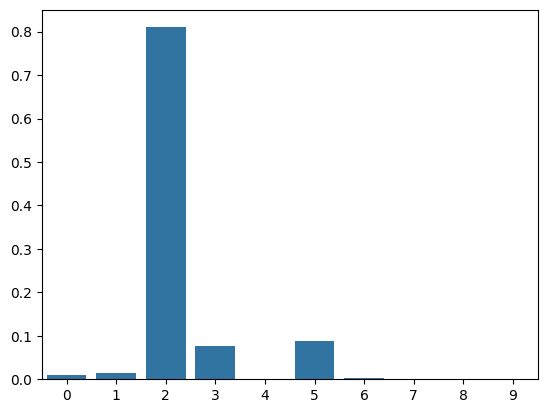

In [45]:
sns.barplot(x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], y=result[0])